In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.3 MB/s eta 0:00:00


In [67]:
import dtreeviz
import seaborn as sns

import pickle
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import tree
import lightgbm as lgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

import pandas as pd
import numpy as np
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# from google.colab import drive
# drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [68]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [69]:
url = 'https://raw.githubusercontent.com/Istiak-Mahmud/CancerDet/main/kag_risk_factors_cervical_cancer.csv'
df = pd.read_csv(url)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [70]:
print(df.head())

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [71]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [72]:
df.shape


(858, 36)

In [73]:
df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858,858,858,858,858,858,858,858,858,...,858,858,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,13,22,12,3,31,63,3,41,3,...,19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,272,163,270,722,722,722,481,269,658,...,787,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [75]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [76]:
missing=df.isnull().sum()
missingcount=df.isnull().count()
percent=round(missing/missingcount *100,2)
missing_df=pd.DataFrame({'count':missingcount,'percentage':percent})
missing_df

,count,percentage
Age,858,0.0
Number of sexual partners,858,0.0
First sexual intercourse,858,0.0
Num of pregnancies,858,0.0
Smokes,858,0.0
Smokes (years),858,0.0
Smokes (packs/year),858,0.0
Hormonal Contraceptives,858,0.0
Hormonal Contraceptives (years),858,0.0
IUD,858,0.0


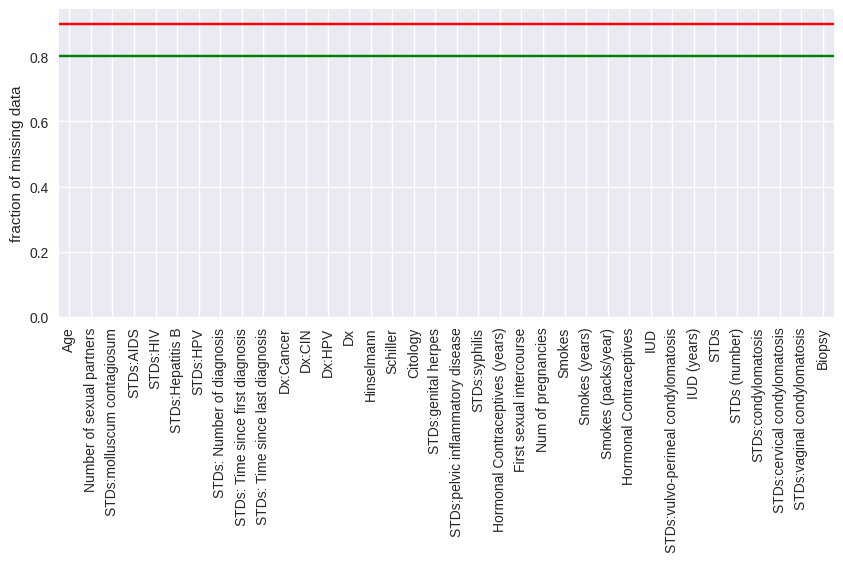

In [77]:
df[df.columns].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("fraction of missing data")
plt.axline(xy1=(0, 0.9), slope=0, color='r', linestyle="-")
plt.axline(xy1=(0, 0.8), slope=0, color='g', linestyle="-")
plt.show()

In [78]:
list(set(df.dtypes.tolist()))
categorical = [f for f in df.columns if df[f].dtype == 'O']
numeric=[f for f in df.columns if df[f].dtype == 'int64']
print(categorical)

['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


<ipython-input-79-4e1048a58e1f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


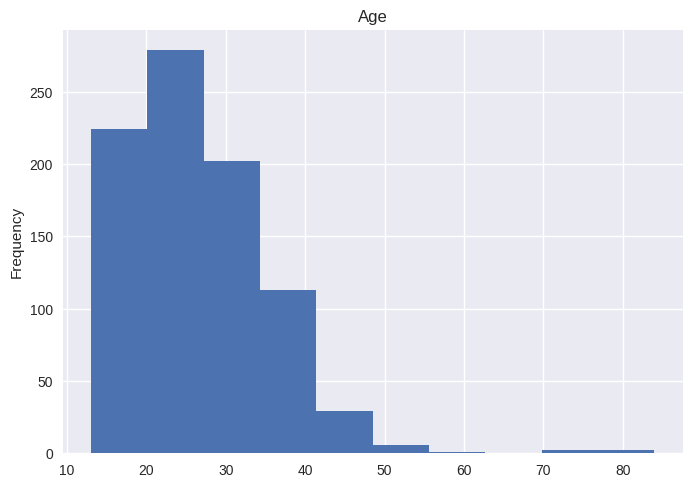

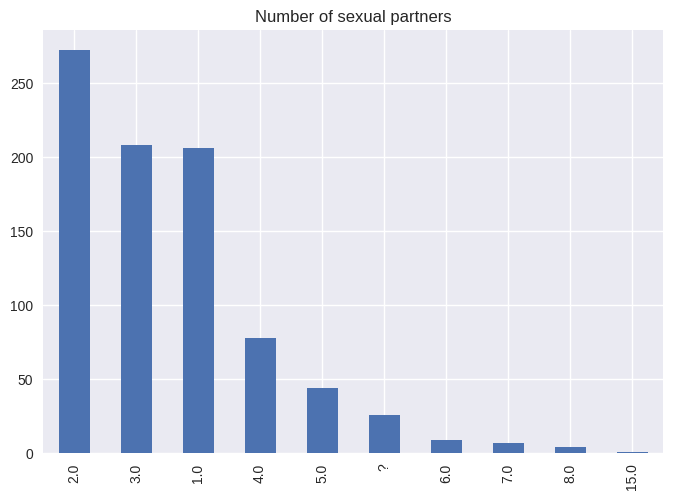

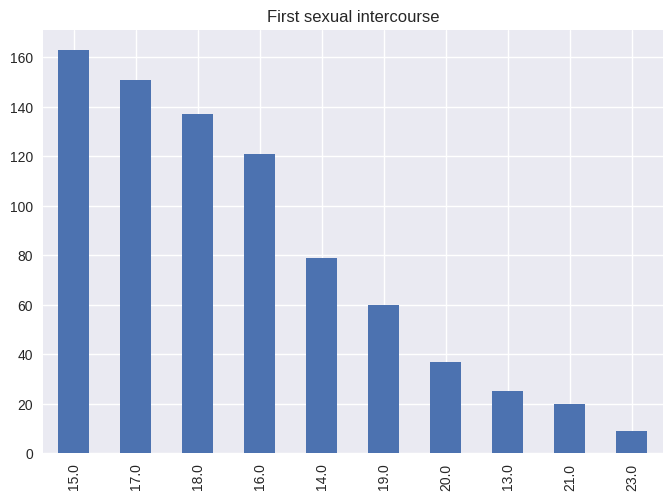

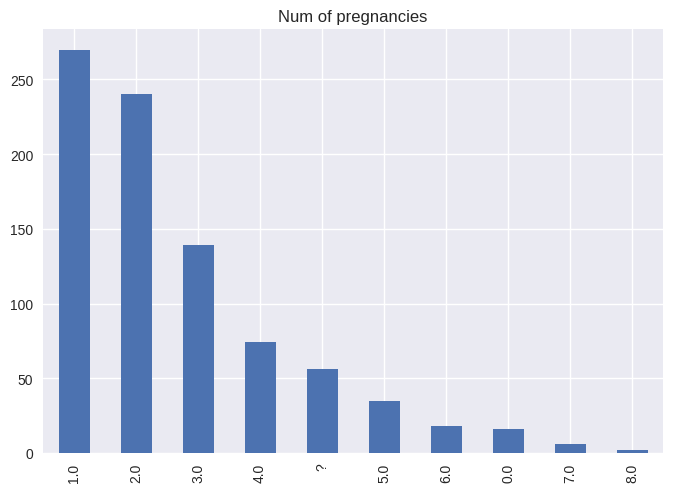

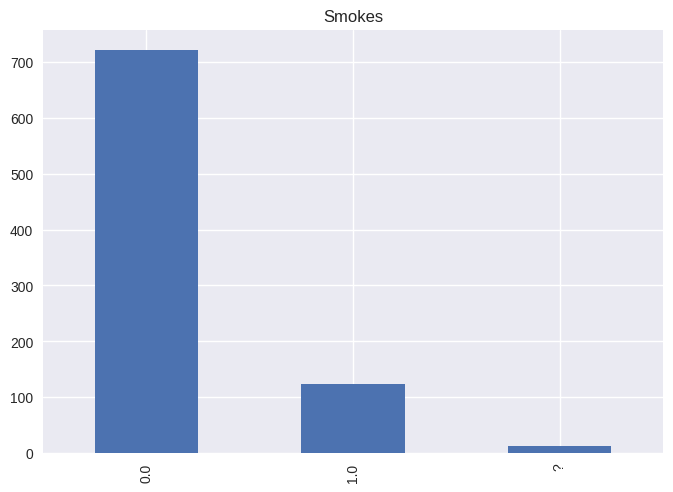

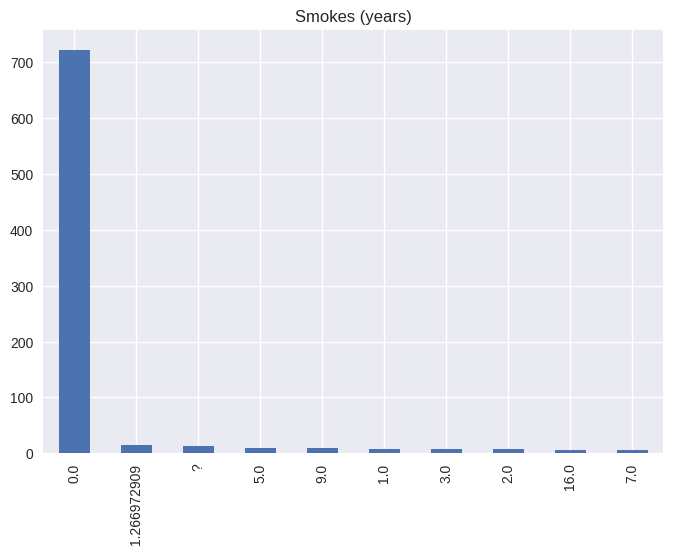

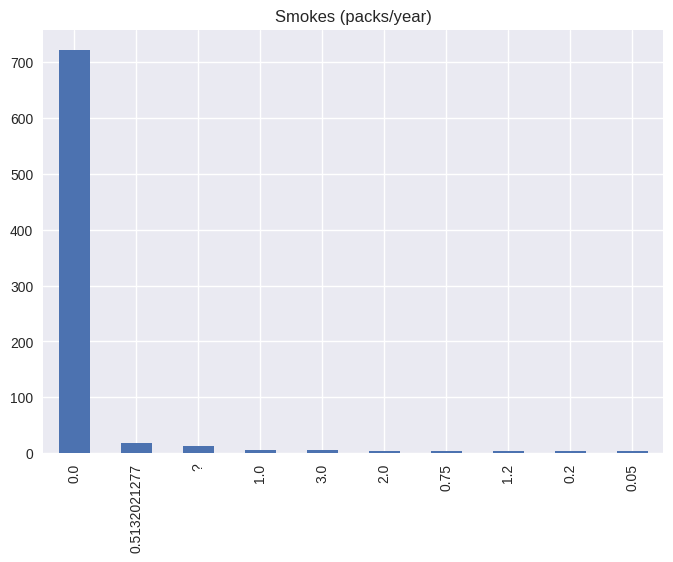

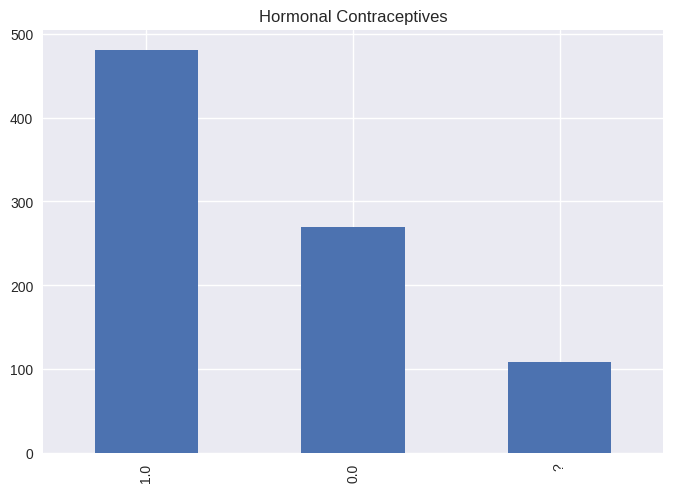

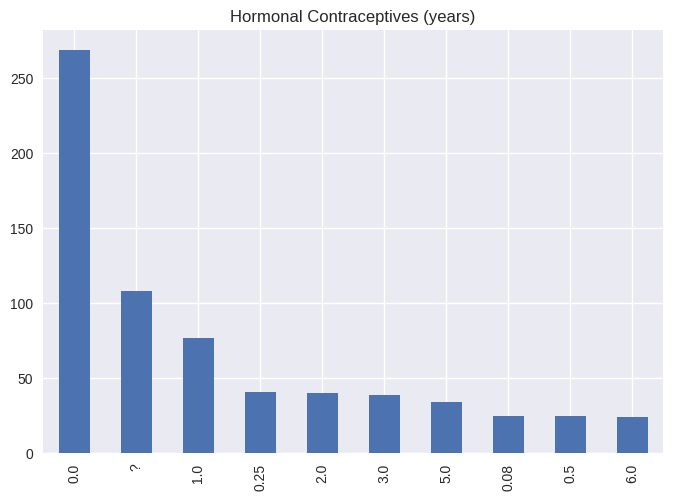

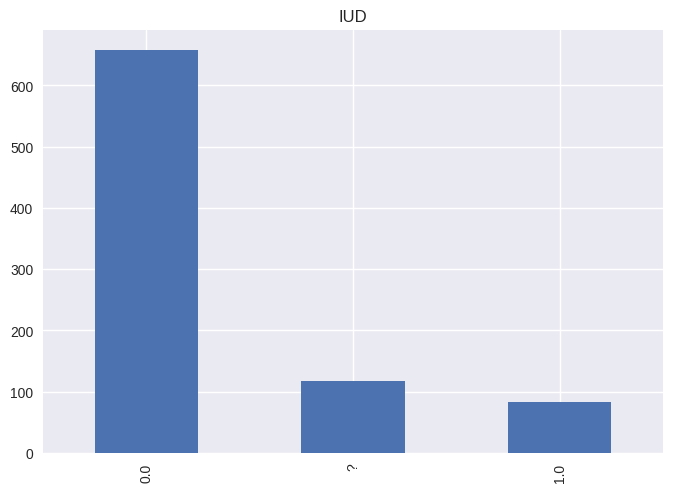

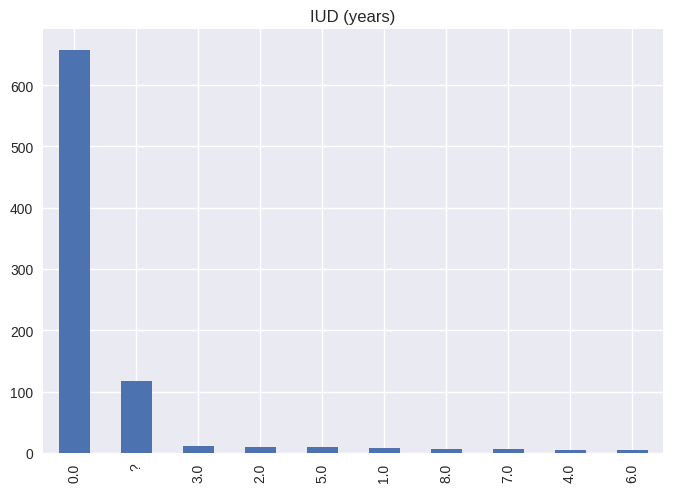

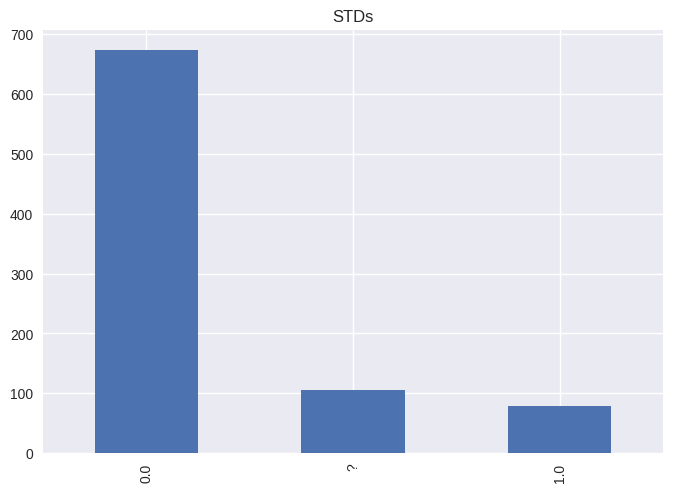

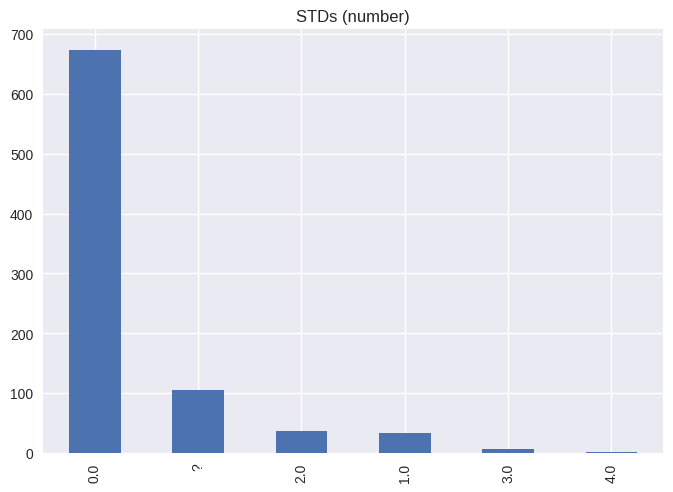

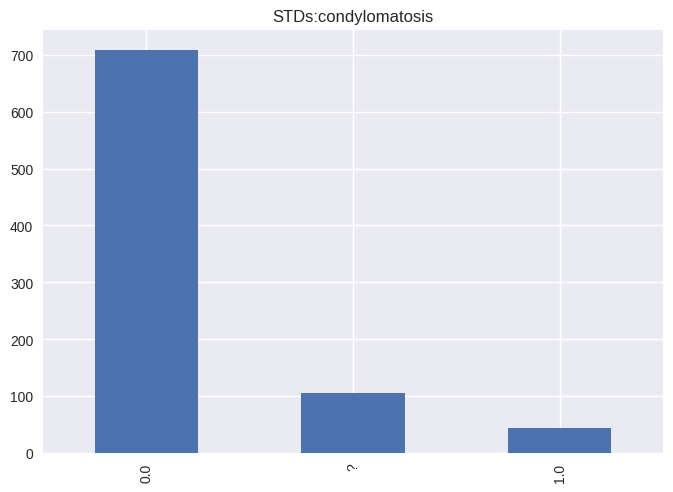

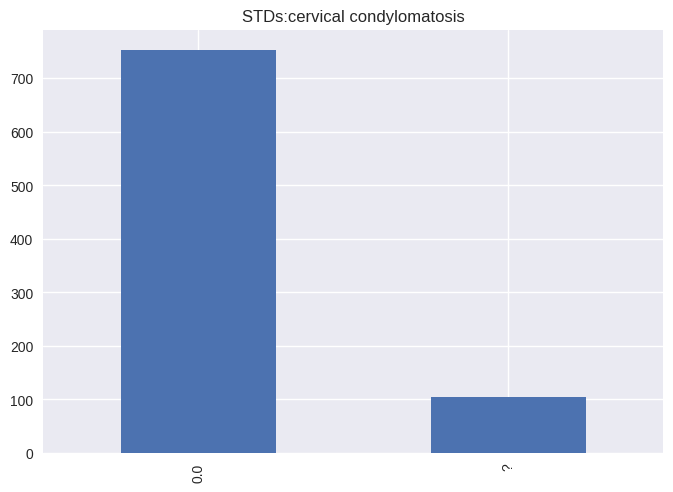

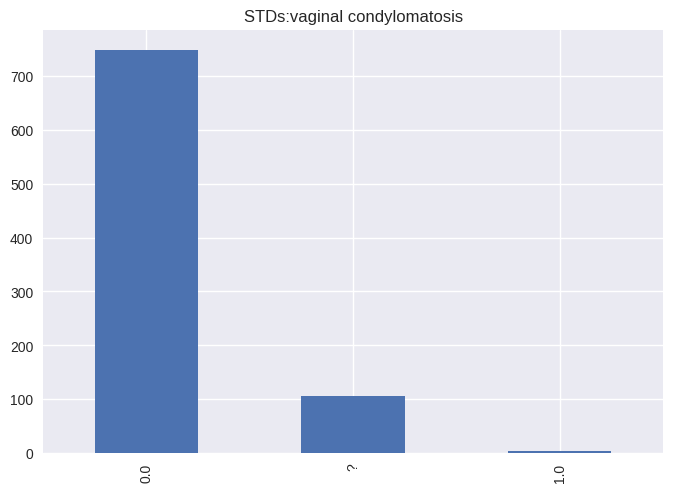

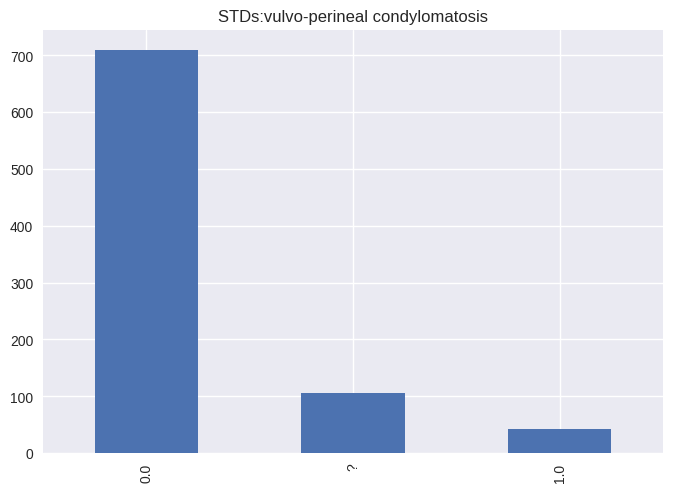

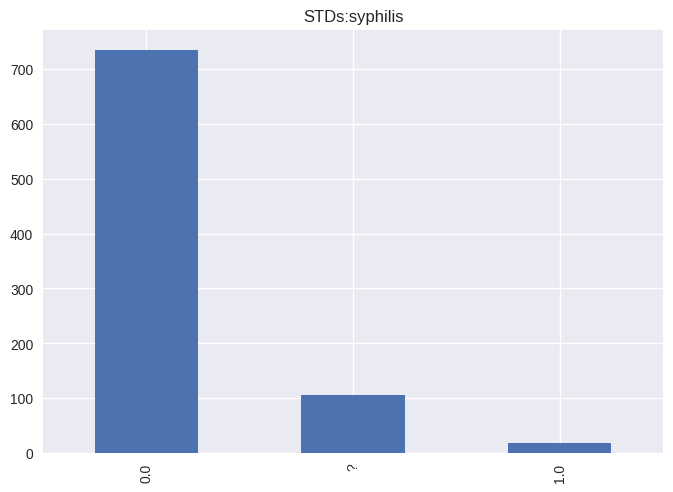

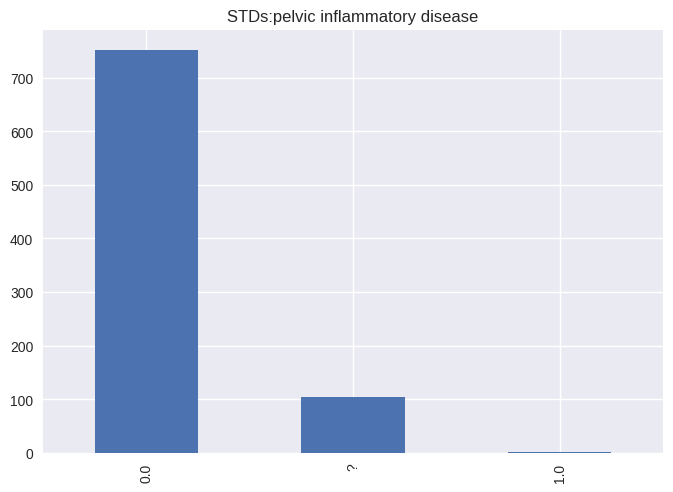

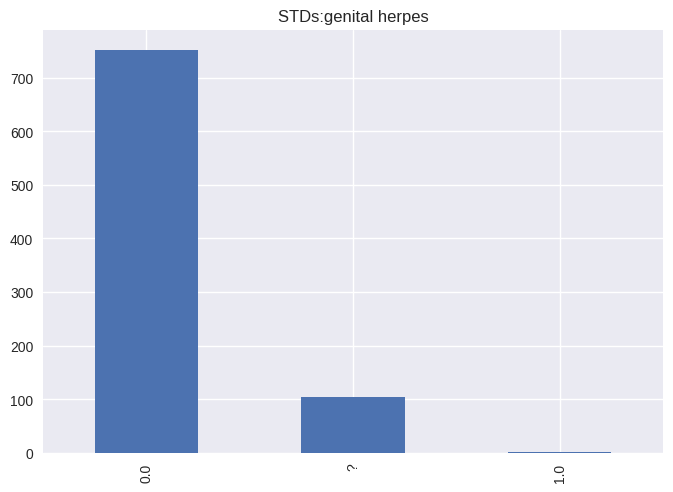

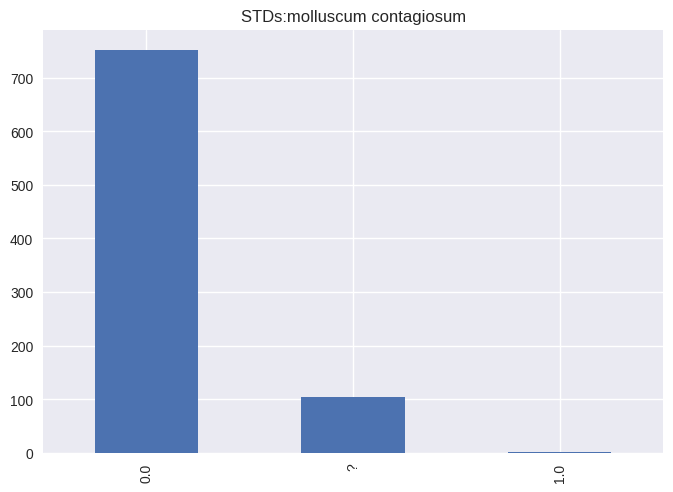

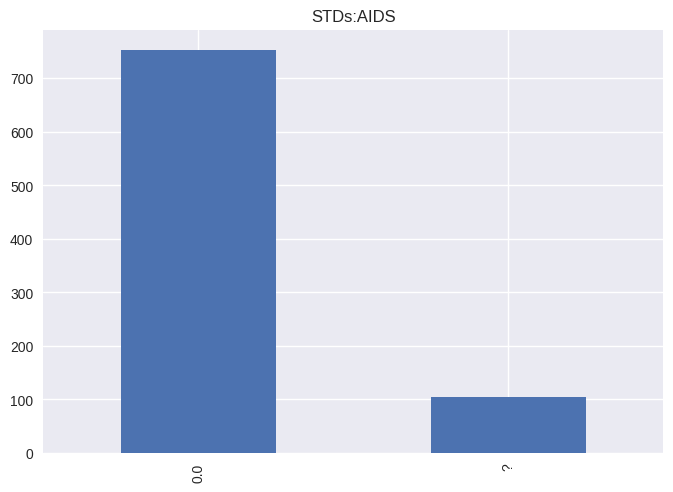

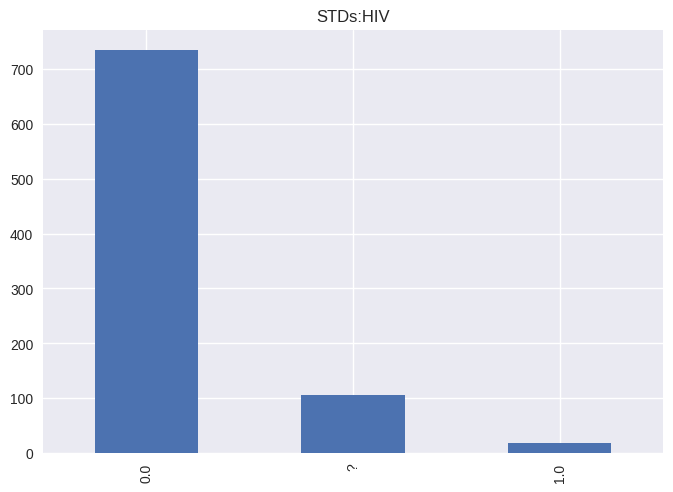

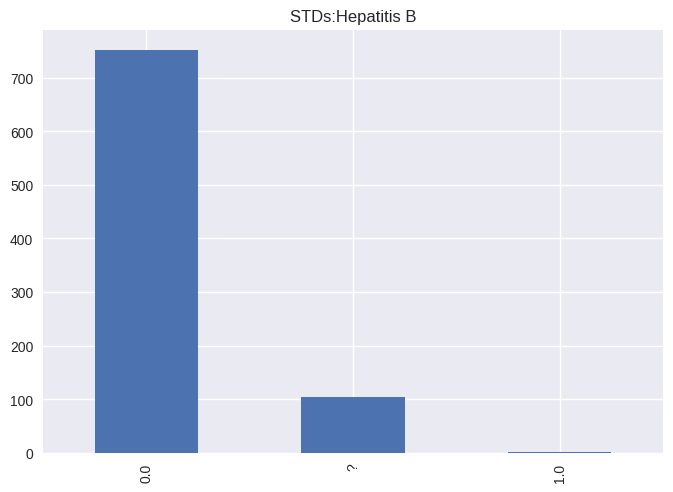

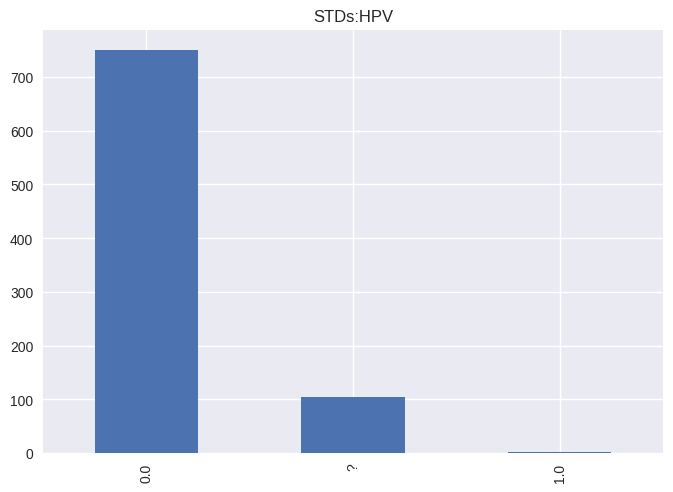

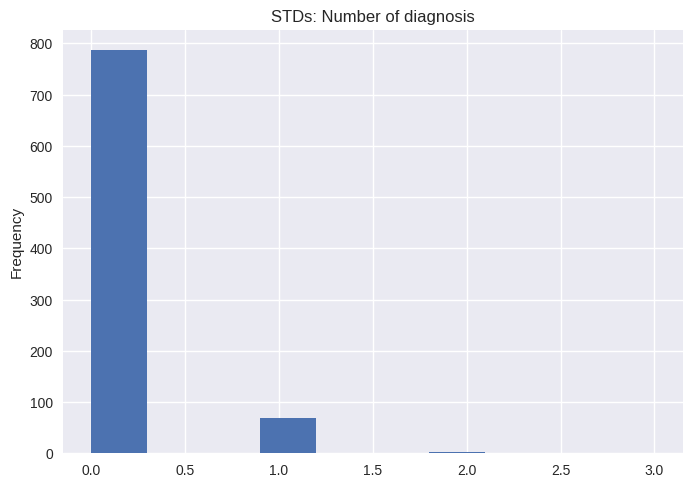

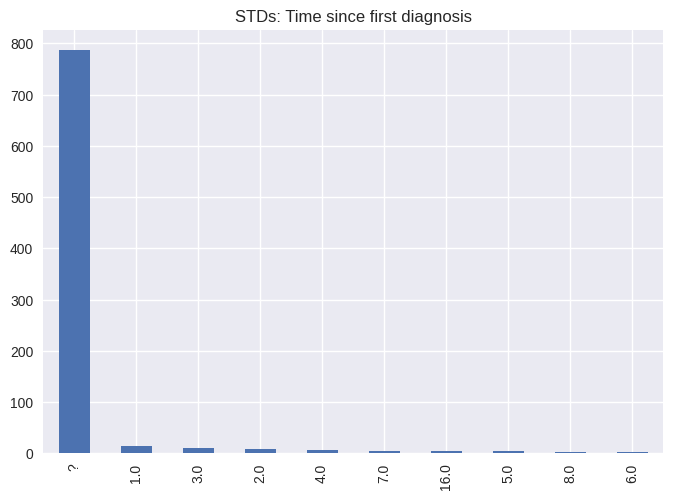

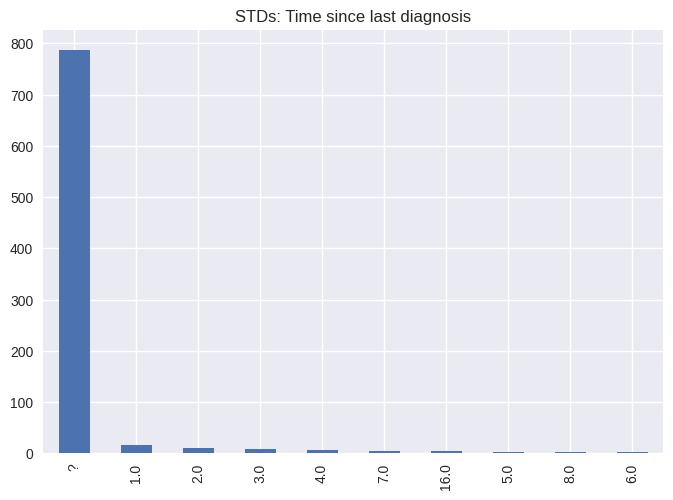

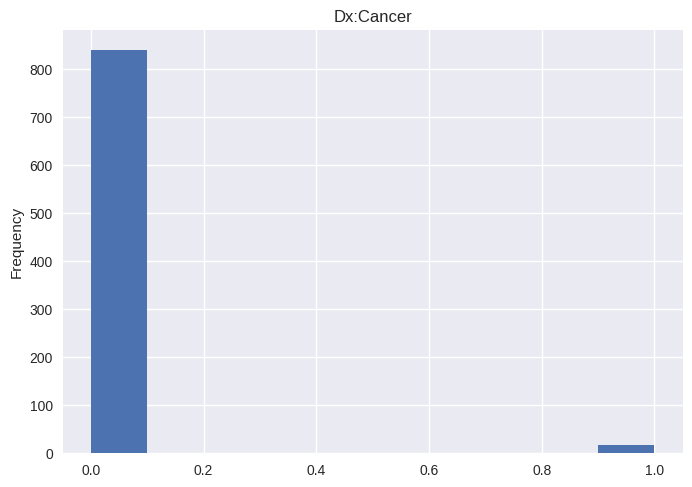

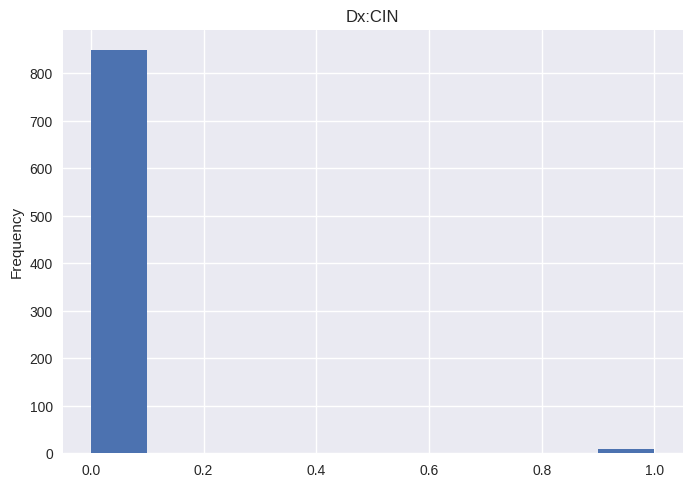

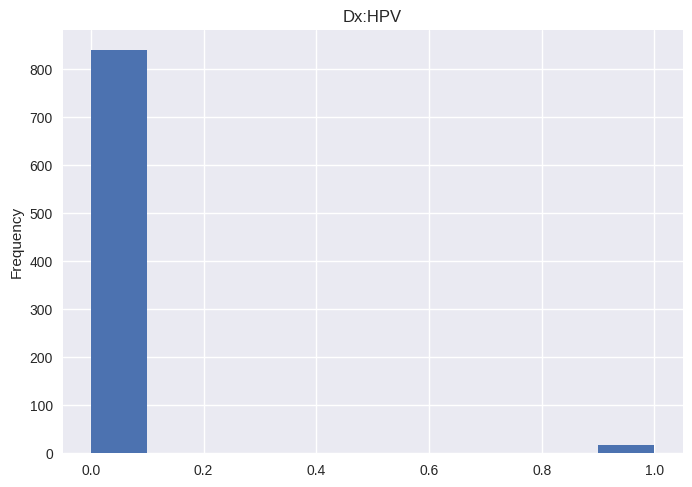

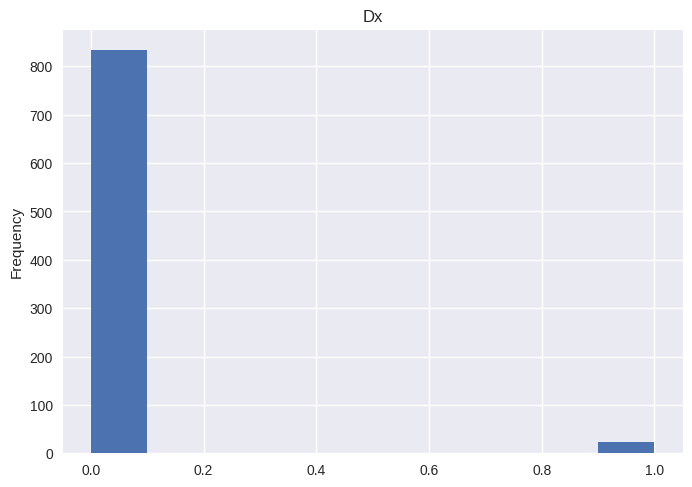

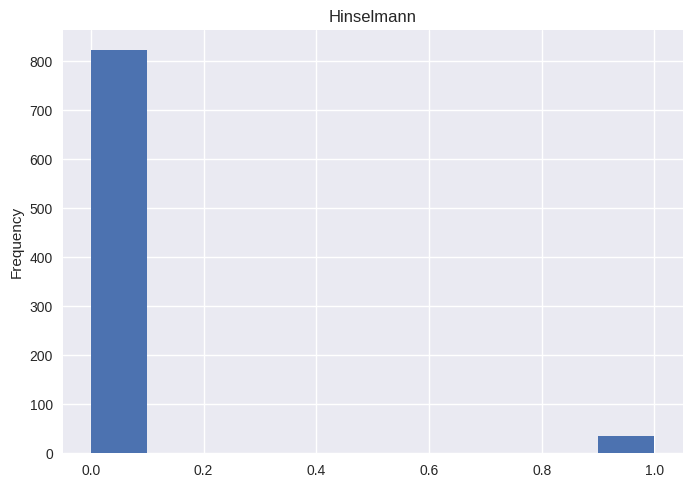

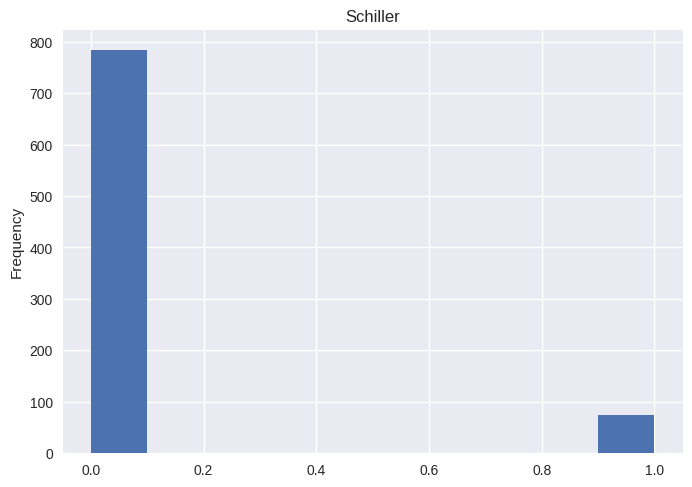

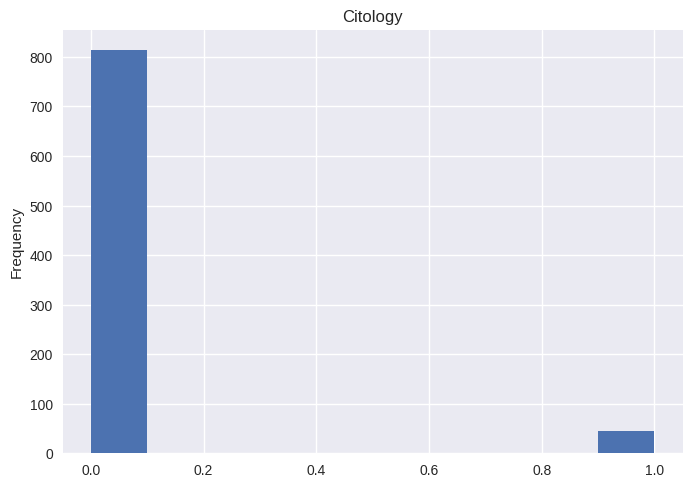

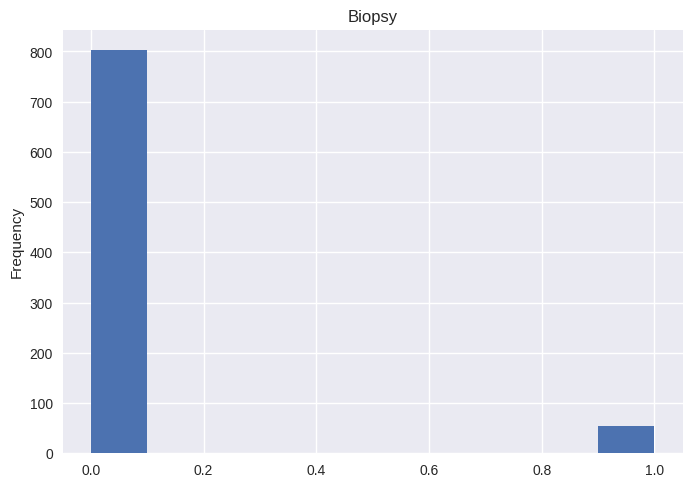

In [79]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for i in df:
    plt.figure(i)
    plt.title(i)
    if is_numeric_dtype(df[i]):
        df[i].plot(kind='hist')
    elif is_string_dtype(df[i]):
        df[i].value_counts()[:10].plot(kind='bar')

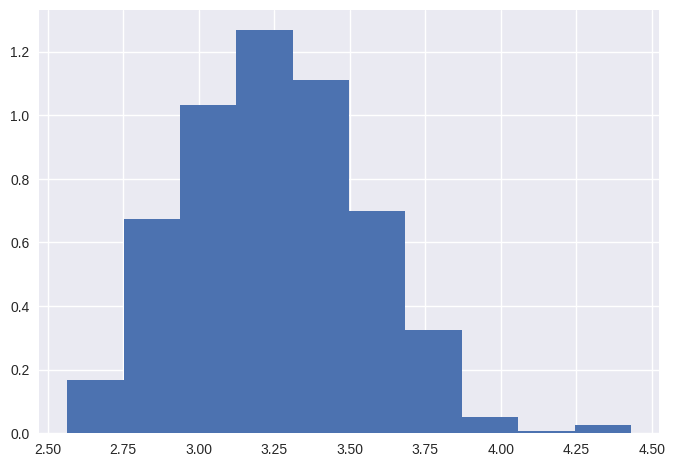

In [80]:
np.log(df['Age']).hist(bins=10,density=True)
plt.show()

<ipython-input-81-3893d0b78bab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

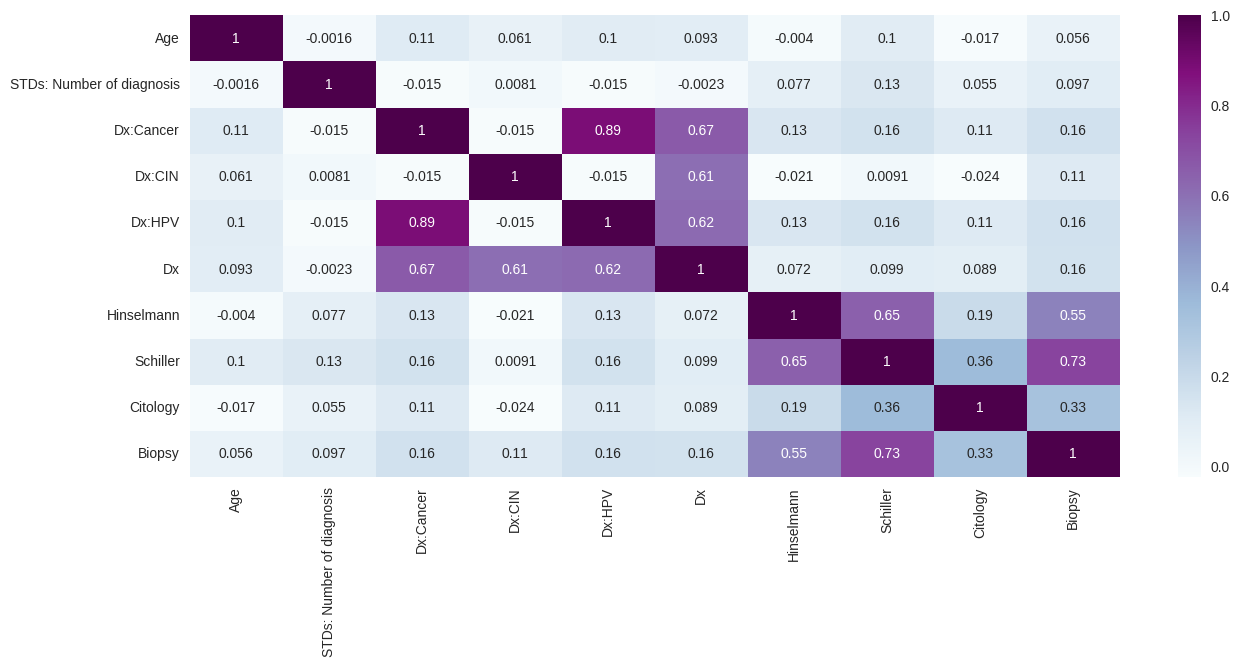

In [81]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

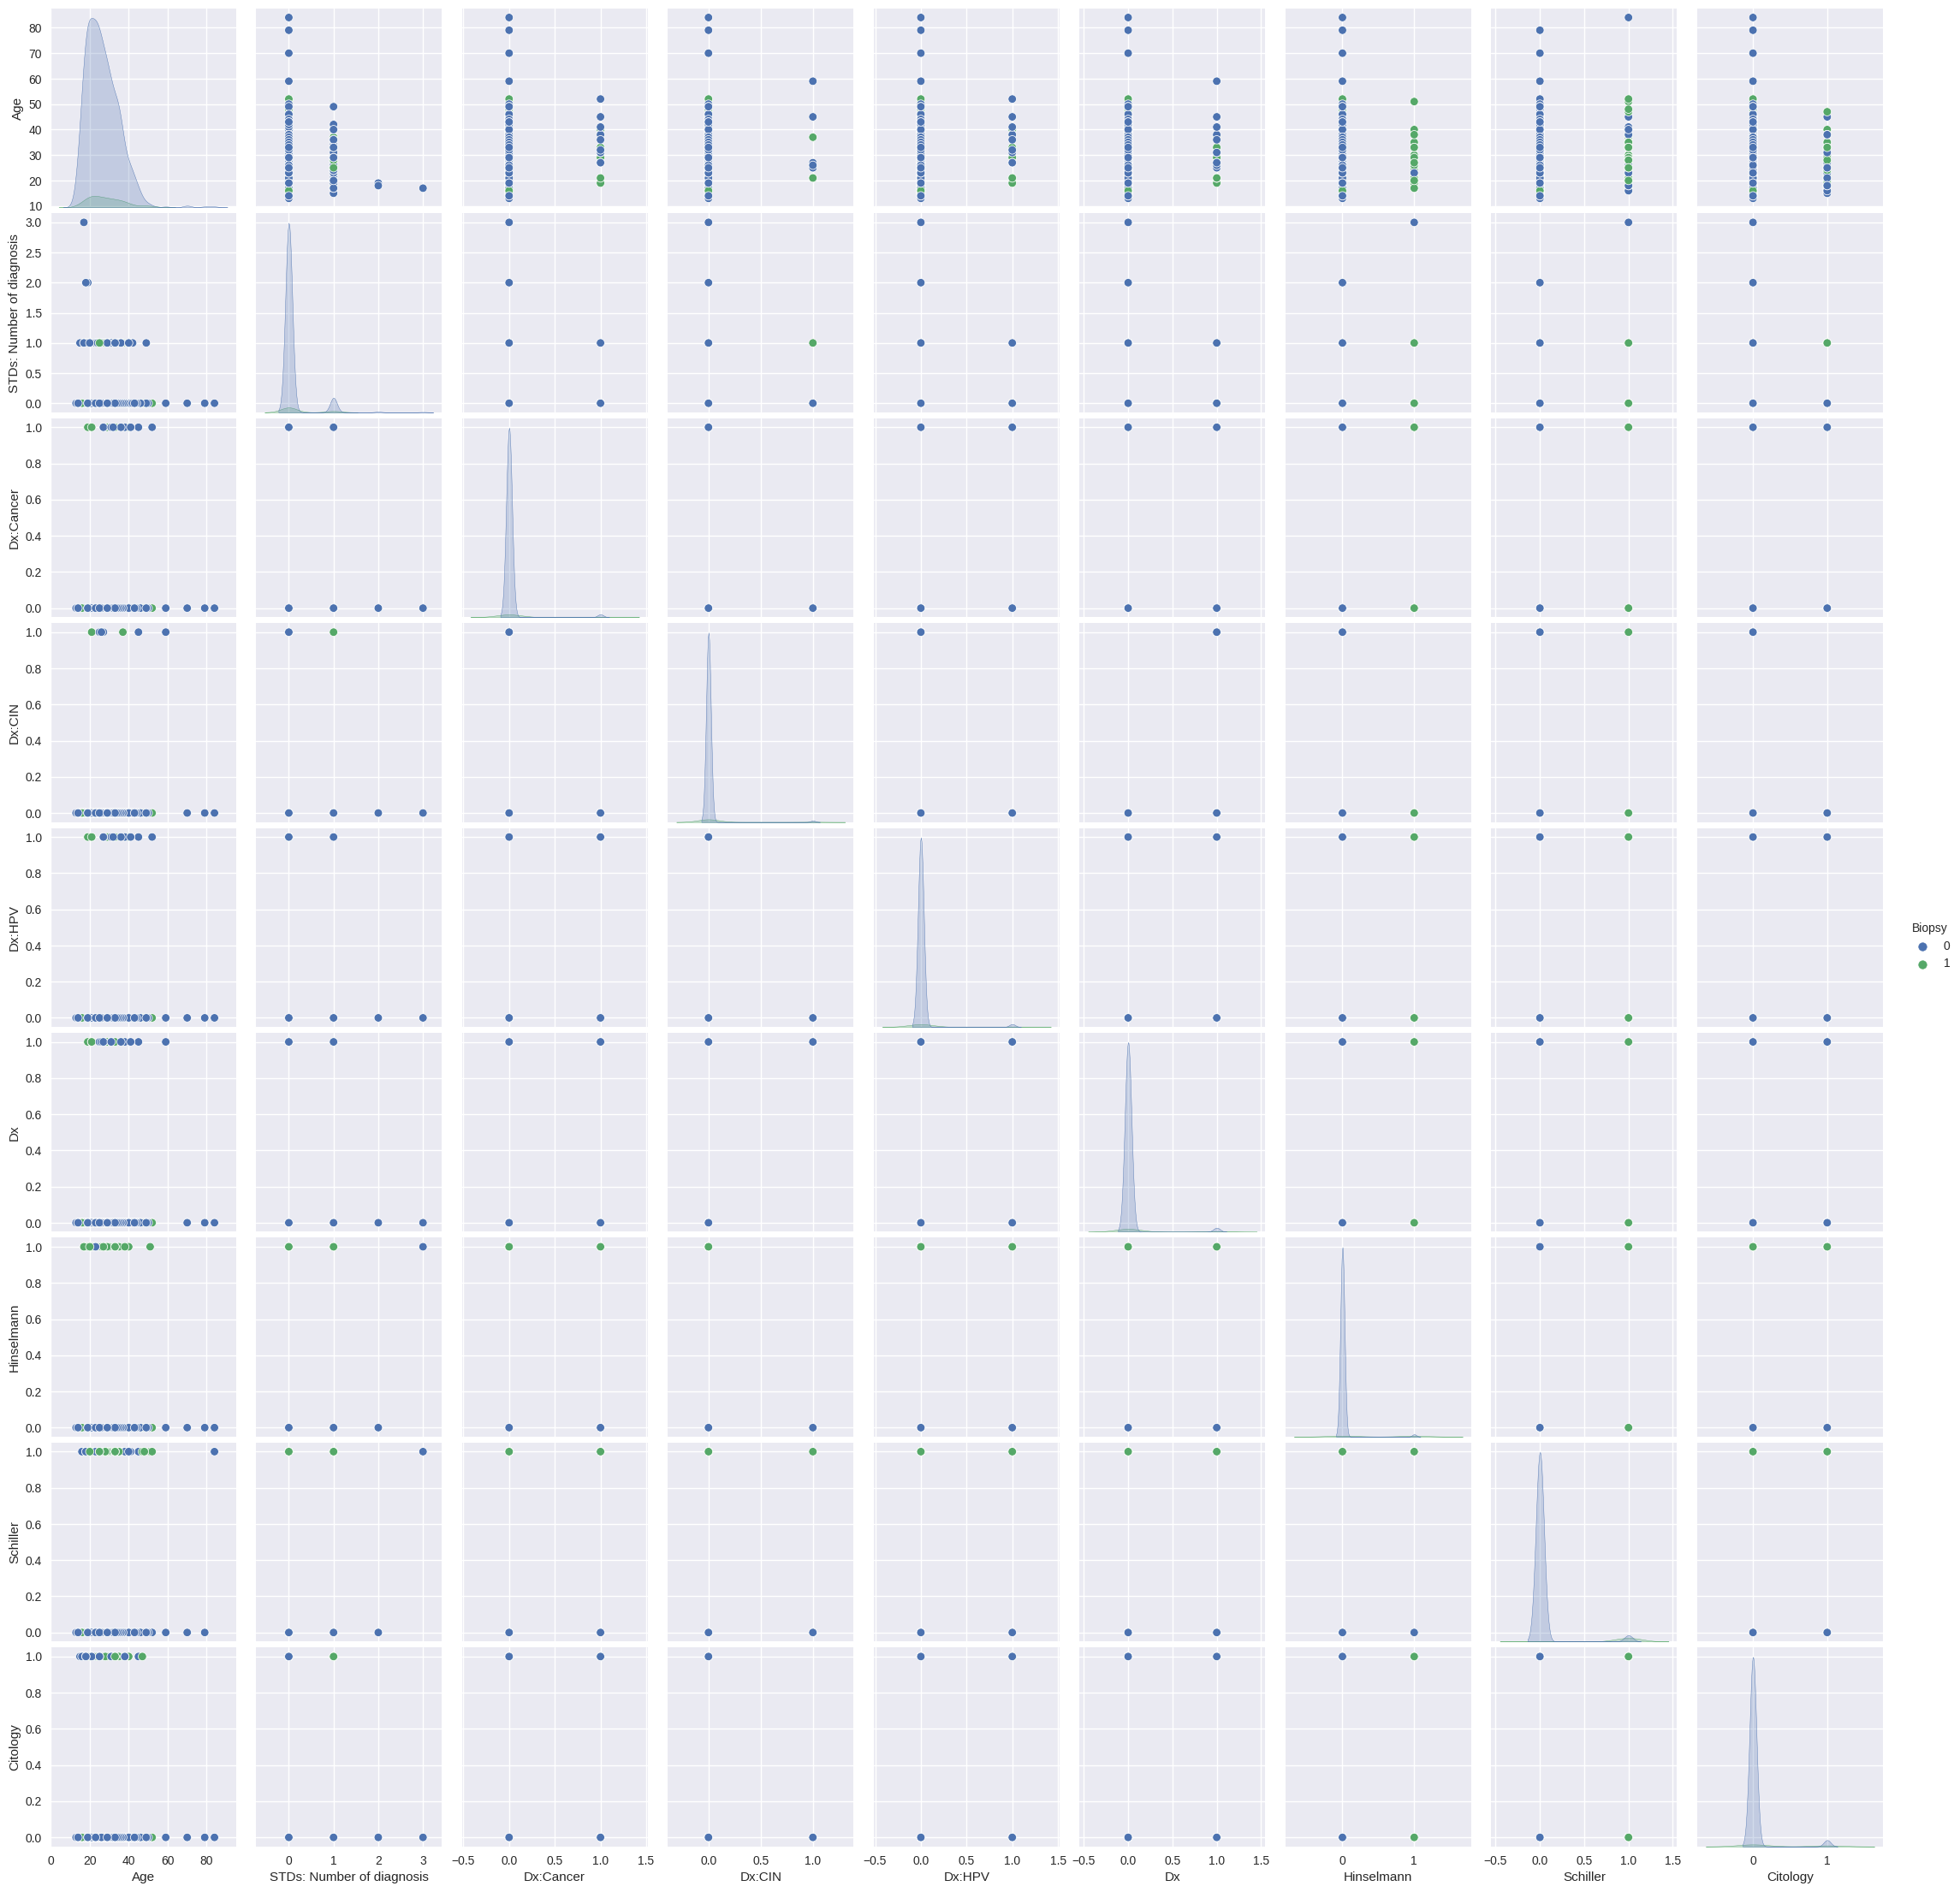

In [ ]:
sns.pairplot(df, hue = 'Biopsy')

In [82]:
for i in range(len(categorical)):
    primary=categorical[i]
    for j in range(len(categorical)):
        secondary=categorical[i]
        if secondary!=primary:
            plt.figure(figsize=(15,15))
            chart=sns.countplot(data=df,x=primary,hue=secondary,palette='GnBu',order=df[primary].value_counts().iloc[:10].index)

df = df.replace('?', -1)

#df=pd.get_dummies(categorical)
categoricalcolumns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller']

df2 = pd.get_dummies(data=df,columns=categoricalcolumns)
df2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
2,34,1.0,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
854,32,2.0,19.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
855,25,2.0,17.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.08,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [83]:
catcolumns=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (packs/year)','Smokes (years)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV']
for i in catcolumns:
    df[i]=df[i].fillna(df[i].median())

In [84]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [85]:
x=df.drop('Biopsy',axis=1)
y=df['Biopsy']

In [86]:

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [87]:
sm = SMOTE(random_state = 42)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

In [88]:
# model = LogisticRegression(solver='liblinear')
# model.fit(X_train2, y_train2)

In [89]:
# prediction=model.predict(X_test)

In [90]:
# print(prediction)

In [91]:
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# confusion=metrics.confusion_matrix(y_test,prediction)
# print(confusion)
# metrics.accuracy_score(y_test,prediction)

In [94]:
estimators = [
    ('Ridge', RandomForestClassifier(n_estimators=30, random_state=42)),
    ('BaysNa', GaussianNB()),
    ('Tree', tree.DecisionTreeClassifier())
]

clf = StackingClassifier(
    estimators=estimators,
    # final_estimator=SGDClassifier(),
    # final_estimator=LogisticRegression(),
    final_estimator=KNeighborsClassifier(n_neighbors=40),
    # final_estimator=lgb.LGBMClassifier(),
    # final_estimator=RandomForestClassifier(),
    # final_estimator=tree.DecisionTreeClassifier(),
    cv=5
)

clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.9418604651162791

In [98]:
# X = df.drop(columns=['Biopsy'])
# y = df['Biopsy']

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# print(X_train.shape)

In [ ]:
# from sklearn.linear_model import RidgeClassifier
# from sklearn import svm
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import BaggingClassifier
# from sklearn import tree
# import lightgbm as lgb

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import VotingClassifier
# from sklearn.pipeline import Pipeline

In [96]:
# models = []
# models.append(('LGBM',lgb.LGBMClassifier()))
# models.append(('Ridge', RidgeClassifier()))
# models.append(('SVR', svm.SVC()))
# models.append(('SGDC', SGDClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=9)))
# # models.append(('cat', CatBoostClassifier()))
# # models.append(('GPC', GaussianProcessClassifier()))
# models.append(('BaysNa', GaussianNB()))
# models.append(('Tree', tree.DecisionTreeClassifier()))
# # models.append(('bagging', BaggingClassifier(RandomForestClassifier(max_depth = 12, min_samples_leaf=1, random_state=42),
# #                            n_estimators=15,
# #                            max_samples=0.5,
# #                            max_features=0.5,
# #                            random_state=10)))



# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   Y_pred = model.fit(X_train, y_train).predict(X_test)
#   print(name)
#   print('Accuracy score: %.2f'
#         % accuracy_score(y_test, Y_pred))


In [97]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       154
           1       1.00      0.44      0.62        18

    accuracy                           0.94       172
   macro avg       0.97      0.72      0.79       172
weighted avg       0.95      0.94      0.93       172



Number of mislabeled points out of a total 172 points : 10


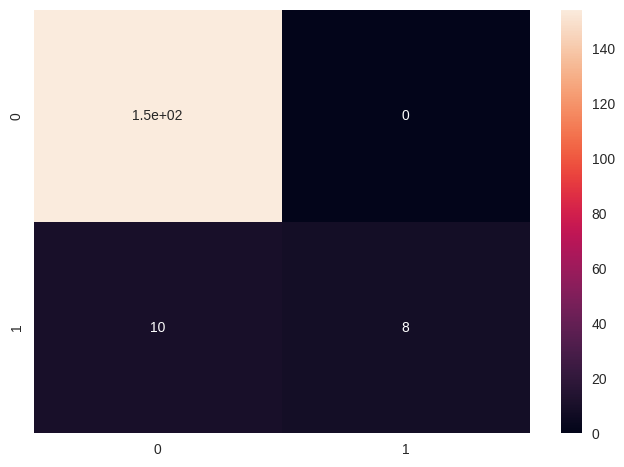

In [99]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot = True)
print("Number of mislabeled points out of a total %d points : %d"
  % (X_test.shape[0], (y_test != y_prediction).sum()))

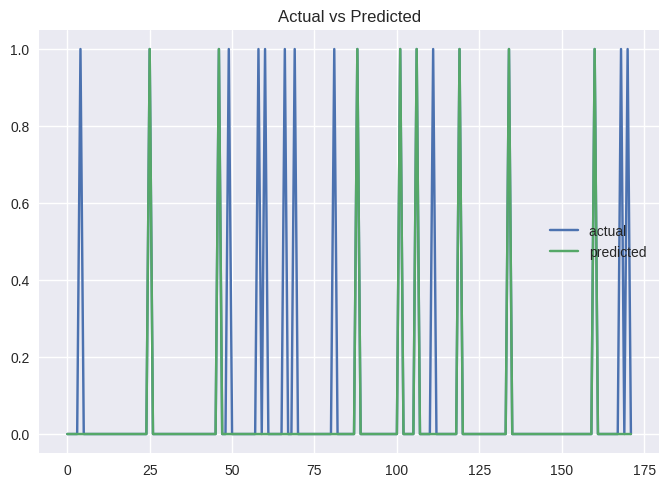

In [100]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (1) does not match total number of classes (2). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (1) does not match total number of classes (2). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
/usr/local/lib

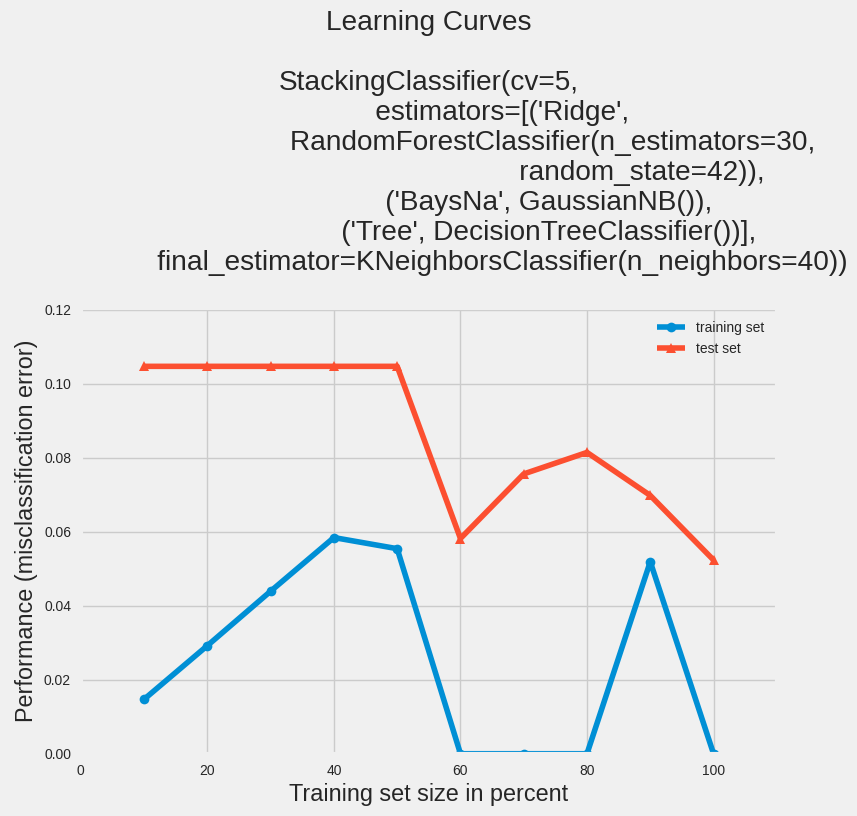

In [101]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()